# **Preparacion de los Datos**

### Cargar y comprender los datos

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/datos_tratados.csv')
df.head()

,ID_Cliente,Cliente_cancelado,Genero,Mayor_de_65_años,En_Pareja,Tiene_Dependientes,Meses_Contratados,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_de_Contrato,Facturacion_Electronica,Metodo_Pago,Cobro_Mensual,Gasto_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Male,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Male,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Female,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40,2.796667


### Eliminar columnas irrelevantes (como identificadores)

In [4]:
df = df.drop(columns=['ID_Cliente'])
df.head()

,Cliente_cancelado,Genero,Mayor_de_65_años,En_Pareja,Tiene_Dependientes,Meses_Contratados,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_de_Contrato,Facturacion_Electronica,Metodo_Pago,Cobro_Mensual,Gasto_Total,Cuentas_Diarias
0,No,Female,No,Si,Si,9,Si,No,DSL,No,...,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30,2.186667
1,No,Male,No,No,No,9,Si,Si,DSL,No,...,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Si,Male,No,No,No,4,Si,No,Fiber optic,No,...,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85,2.463333
3,Si,Male,Si,Si,No,13,Si,No,Fiber optic,No,...,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85,3.266667
4,Si,Female,Si,Si,No,3,Si,No,Fiber optic,No,...,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40,2.796667


### Transformar variables categóricas a numéricas (One-Hot Encoding)

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Meses_Contratados,Cobro_Mensual,Gasto_Total,Cuentas_Diarias,Cliente_cancelado_Si,Genero_Male,Mayor_de_65_años_Si,En_Pareja_Si,Tiene_Dependientes_Si,Servicio_Telefonico_Si,...,Streaming_TV_No internet service,Streaming_TV_Si,Streaming_Peliculas_No internet service,Streaming_Peliculas_Si,Tipo_de_Contrato_One year,Tipo_de_Contrato_Two year,Facturacion_Electronica_Si,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,9,65.6,593.30,2.186667,False,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,9,59.9,542.40,1.996667,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,4,73.9,280.85,2.463333,True,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,13,98.0,1237.85,3.266667,True,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,3,83.9,267.40,2.796667,True,False,True,True,False,True,...,False,True,False,False,False,False,True,False,False,True


### Ver proporción de cancelaciones y balance de clases

In [6]:
cancelacion_proporcion = df['Cliente_cancelado'].value_counts(normalize=True)
cancelacion_proporcion

,proportion
Cliente_cancelado,
No,0.720888
Si,0.279112


### Normalización

In [11]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(columns=['Cliente_cancelado_Si'])
y = df_encoded['Cliente_cancelado_Si']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# **Análisis de Correlación y Selección de Variables**

### Matriz de correlación

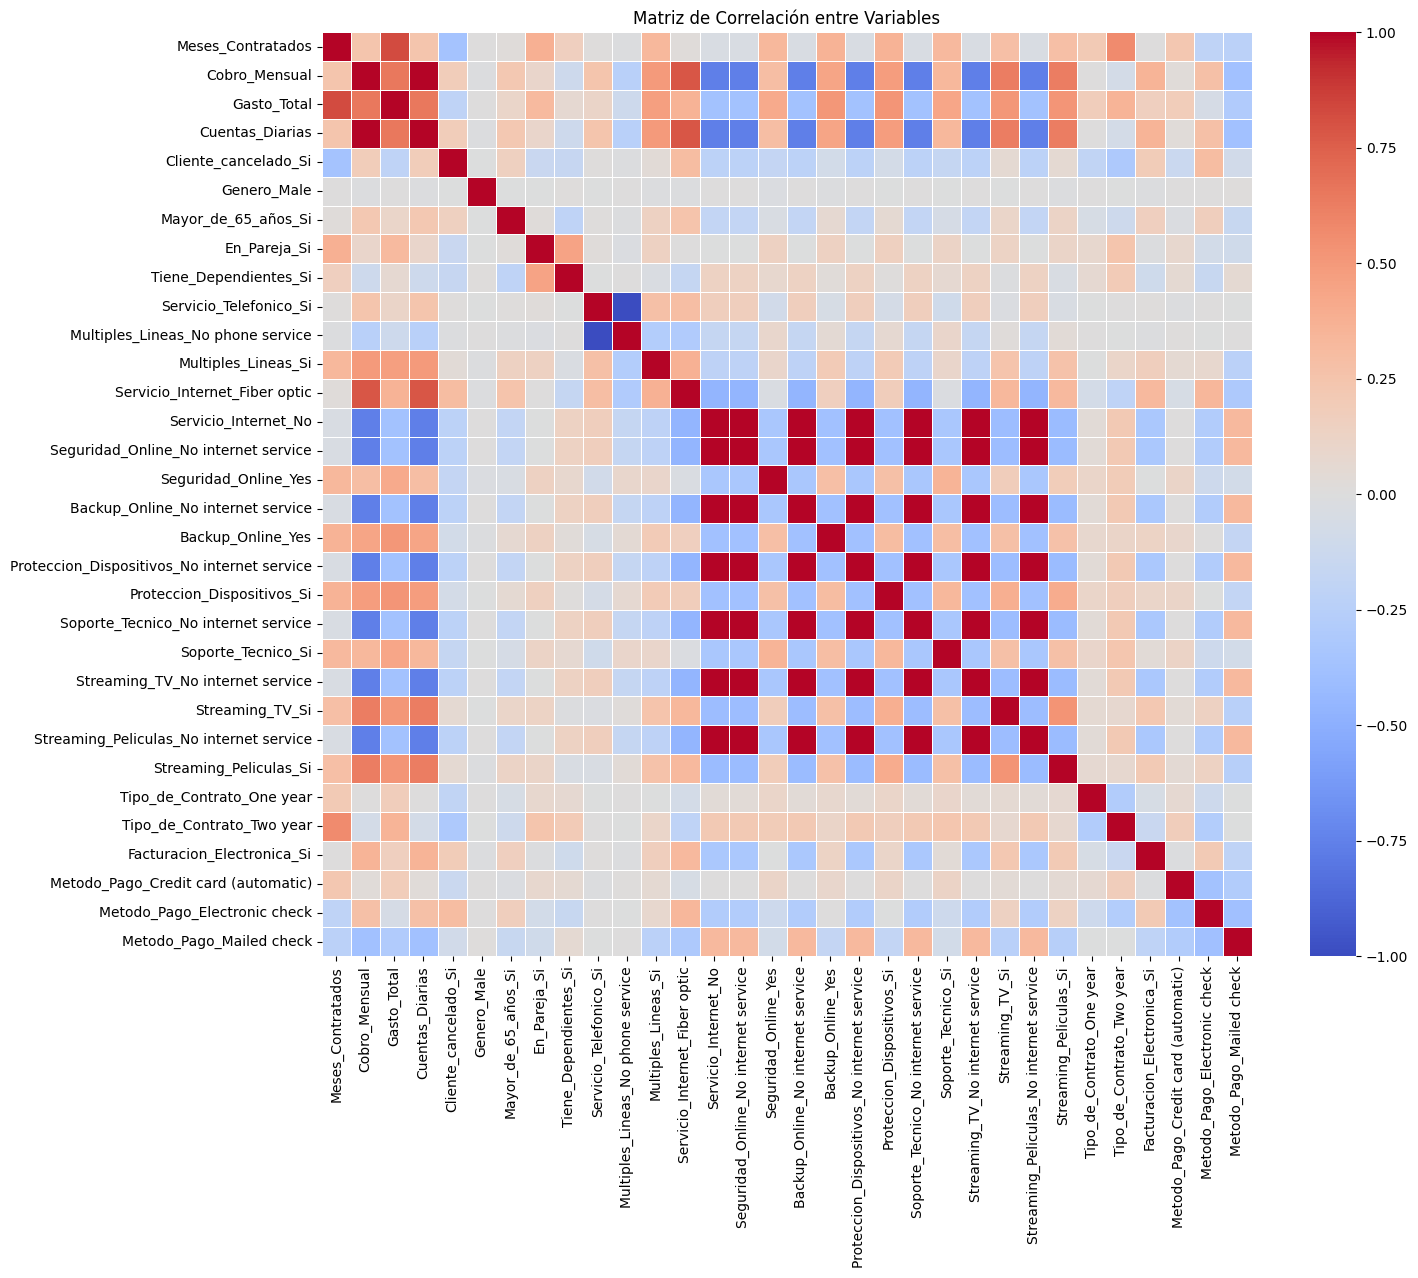

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

### Ver variables más correlacionadas con la cancelación

In [13]:
cor_target = correlation_matrix['Cliente_cancelado_Si'].drop('Cliente_cancelado_Si')
cor_target_sorted = cor_target.abs().sort_values(ascending=False)
print(cor_target_sorted.head(10))

Meses_Contratados                              0.361238
Tipo_de_Contrato_Two year                      0.309906
Servicio_Internet_Fiber optic                  0.303380
Metodo_Pago_Electronic check                   0.300945
Backup_Online_No internet service              0.224297
Seguridad_Online_No internet service           0.224297
Servicio_Internet_No                           0.224297
Proteccion_Dispositivos_No internet service    0.224297
Soporte_Tecnico_No internet service            0.224297
Streaming_Peliculas_No internet service        0.224297
Name: Cliente_cancelado_Si, dtype: float64


### Ejemplo con "Gasto_Total" y "Meses_Contratados"

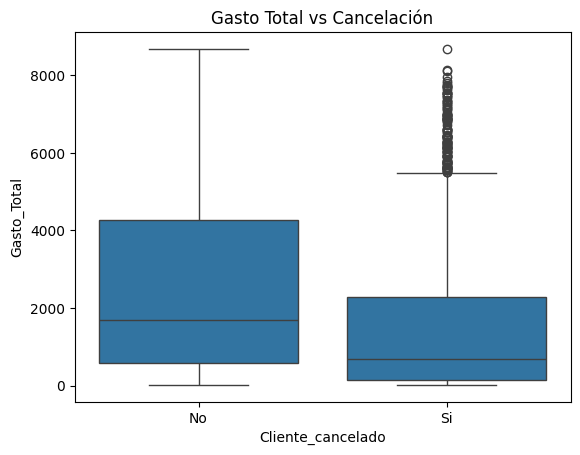

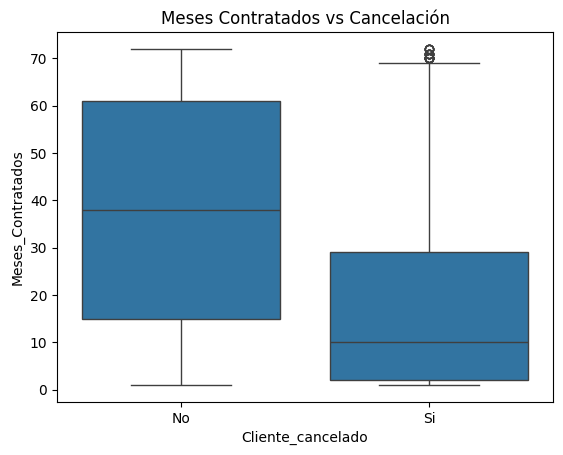

In [14]:
import seaborn as sns

sns.boxplot(x=df['Cliente_cancelado'], y=df['Gasto_Total'])
plt.title("Gasto Total vs Cancelación")
plt.show()

sns.boxplot(x=df['Cliente_cancelado'], y=df['Meses_Contratados'])
plt.title("Meses Contratados vs Cancelación")
plt.show()


# **Modelado Predictivo**

### División del dataset en entrenamiento y prueba

In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Cliente_cancelado_Si'])
y = df_encoded['Cliente_cancelado_Si']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

###  Entrenar los modelos

#### Regresión Logística

In [16]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_scaled, y_train_scaled)

LogisticRegression(max_iter=1000)

#### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_tree, y_train_tree)

RandomForestClassifier(random_state=42)

### Evaluar los modelos

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print("Regresión Logística:\n")
y_pred_logreg = model_logreg.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_logreg))
print("Matriz de confusión:\n", confusion_matrix(y_test_scaled, y_pred_logreg))

print("\nRandom Forest:\n")
y_pred_rf = model_rf.predict(X_test_tree)
print(classification_report(y_test_tree, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test_tree, y_pred_rf))


Regresión Logística:

              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1549
        True       0.66      0.57      0.61       600

    accuracy                           0.80      2149
   macro avg       0.75      0.73      0.74      2149
weighted avg       0.79      0.80      0.79      2149

Matriz de confusión:
 [[1371  178]
 [ 258  342]]

Random Forest:

              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1549
        True       0.65      0.53      0.59       600

    accuracy                           0.79      2149
   macro avg       0.74      0.71      0.72      2149
weighted avg       0.78      0.79      0.78      2149

Matriz de confusión:
 [[1378  171]
 [ 281  319]]


### Detectar overfitting

In [19]:
print("Precisión Regresión Logística - Entrenamiento:", model_logreg.score(X_train_scaled, y_train_scaled))
print("Precisión Regresión Logística - Prueba:", model_logreg.score(X_test_scaled, y_test_scaled))

print("\nPrecisión Random Forest - Entrenamiento:", model_rf.score(X_train_tree, y_train_tree))
print("Precisión Random Forest - Prueba:", model_rf.score(X_test_tree, y_test_tree))

Precisión Regresión Logística - Entrenamiento: 0.7949331737482546
Precisión Regresión Logística - Prueba: 0.7971149371800837

Precisión Random Forest - Entrenamiento: 0.9910233393177738
Precisión Random Forest - Prueba: 0.7896696137738483


# **Regresión Logística: Interpretación de Coeficientes**

In [22]:
import numpy as np

coefficients = pd.Series(model_logreg.coef_[0], index=X.columns)

important_coeffs = coefficients.abs().sort_values(ascending=False)

print("Coeficientes más importantes (Regresión Logística):")
print(coefficients.loc[important_coeffs.index[:10]])

Coeficientes más importantes (Regresión Logística):
Meses_Contratados               -1.267933
Tipo_de_Contrato_Two year       -0.653849
Gasto_Total                      0.623869
Servicio_Internet_Fiber optic    0.336850
Tipo_de_Contrato_One year       -0.330810
Seguridad_Online_Yes            -0.197738
Soporte_Tecnico_Si              -0.197219
Metodo_Pago_Electronic check     0.161438
Facturacion_Electronica_Si       0.152026
Mayor_de_65_años_Si              0.102949
dtype: float64


# **Random Forest: Importancia de Variables**

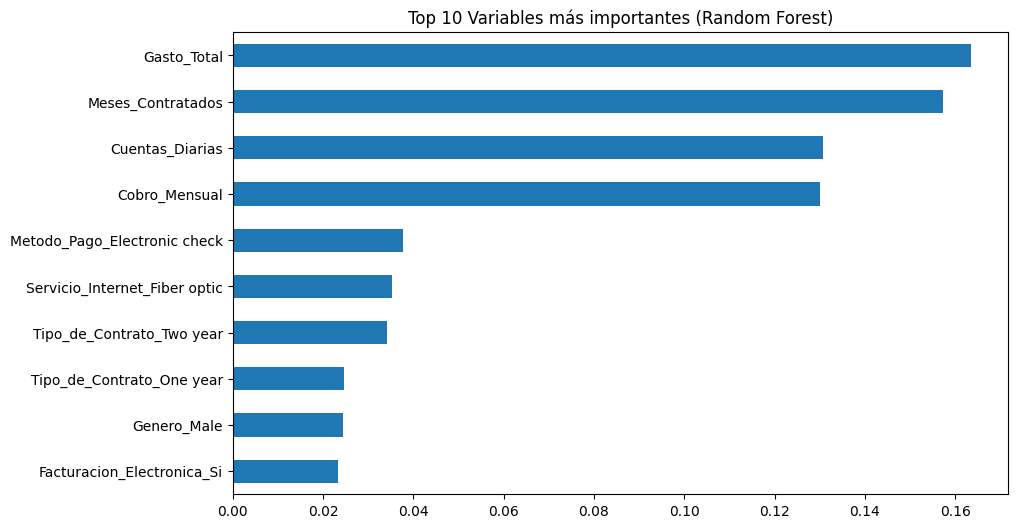

In [24]:
import matplotlib.pyplot as plt

importancias = pd.Series(model_rf.feature_importances_, index=X.columns)
importantes_rf = importancias.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
importantes_rf.plot(kind='barh')
plt.title("Top 10 Variables más importantes (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

# **Interpretación y Conclusiones Estratégicas**

### Variables más relevantes
Tras analizar los coeficientes de la Regresión Logística y la importancia de variables en el Random Forest, encontramos que las siguientes variables tienen mayor impacto en la cancelación de clientes:

| Variable                         | Impacto Observado                                                |
|---------------------------------|-----------------------------------------------------------------|
| Meses_Contratados               | A menor cantidad de meses, mayor probabilidad de cancelación    |
| Tipo_de_Contrato_Month-to-month | Los contratos mensuales tienen alta tasa de cancelación         |
| Metodo_Pago_Electronic check    | Clientes con este método cancelan más                            |
| Cobro_Mensual                  | Cuotas más altas están asociadas a cancelaciones                |
| Servicio_Internet_Fiber optic  | Clientes con fibra óptica cancelan más que con DSL o sin servicio|
| Soporte_Tecnico_No              | Falta de soporte técnico puede llevar a deserción               |

# Comparación de Modelos

| Modelo             | Precisión Entrenamiento | Precisión Prueba | Observación                     |
|--------------------|------------------------|-----------------|--------------------------------|
| Regresión Logística | 79.49%                 | 79.71%          | Buen rendimiento y generalización |
| Random Forest      | 99.10%                 | 78.96%          | Overfitting, necesita ajuste    |

**Conclusión:** Para una solución inicial robusta y explicativa, la Regresión Logística es la opción preferida. El Random Forest podría optimizarse, pero sufre de sobreajuste.

# Estrategias de Retención Basadas en el Modelo

- **Incentivar contratos a largo plazo**  
  Los clientes con contratos mensuales son los más propensos a cancelar. Ofrecer descuentos por compromisos de 1 o 2 años puede mejorar la retención.

- **Reducir fricción en métodos de pago**  
  "Electronic Check" está relacionado con altas tasas de cancelación. Promover métodos más cómodos y automatizados (como tarjeta o débito automático).

- **Mejorar soporte técnico**  
  Muchos clientes que cancelan no tienen acceso o no usan soporte técnico. Mejorar visibilidad y accesibilidad de este servicio.

- **Segmentar clientes con alto gasto mensual**  
  Los clientes con facturas altas están en riesgo. Puede ser útil ofrecerles mejores planes personalizados o beneficios exclusivos.

- **Intervenir en los primeros meses**  
  Aquellos que cancelan, muchas veces lo hacen pronto. Automatizar seguimientos durante los primeros 3-6 meses podría hacer la diferencia.

# Recomendación Final
Se recomienda implementar un sistema de alertas internas basado en los factores identificados, para intervenir con los clientes en riesgo antes de que cancelen. Los modelos construidos pueden integrarse a un dashboard de atención al cliente para facilitar estas decisiones.